In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from mglearn import *
import matplotlib.pyplot as plt

In [47]:
plt.rcParams['font.family'] = 'gulim'

In [43]:
x, y  = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=42)

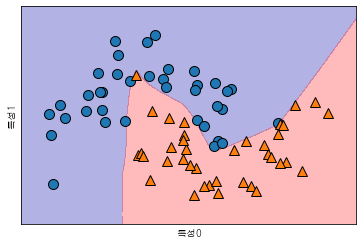

In [48]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)
plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('특성0')
plt.ylabel('특성1');

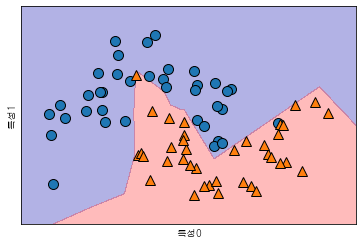

In [25]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10], random_state=0).fit(x_train, y_train).fit(x_train,y_train)
plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('특성0')
plt.ylabel('특성1');

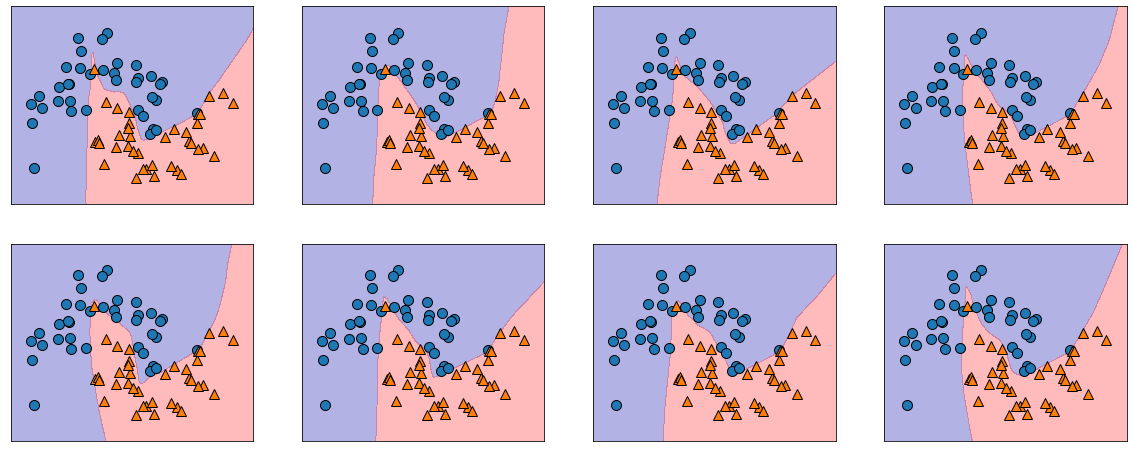

In [34]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100,100], random_state=i).fit(x_train, y_train)
    plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
    discrete_scatter(x_train[:,0], x_train[:,1], y_train, ax=ax)

In [50]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42).fit(x_train, y_train)
print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(x_train, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(x_test, y_test)))

훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.92


In [51]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)
x_train_scaled = (x_train-mean_on_train)/std_on_train
x_test_scaled= (x_test-mean_on_train)/std_on_train

In [39]:
mlp = MLPClassifier(random_state=0).fit(x_train_scaled, y_train)
print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.99
테스트 세트 정확도 : 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(x_train_scaled, y_train)
print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.97


In [53]:
mlp = MLPClassifier(max_iter=1000,alpha=1, random_state=0).fit(x_train_scaled, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.972


In [54]:
mlp.coefs_[0].std(axis=1)

array([0.02559193, 0.04066835, 0.03308025, 0.03081333, 0.01669964,
       0.01838658, 0.03626209, 0.04066151, 0.02432519, 0.01737967,
       0.05508384, 0.01659837, 0.04014836, 0.036805  , 0.0131538 ,
       0.03408178, 0.01182728, 0.015795  , 0.01424585, 0.02966082,
       0.04854174, 0.05185808, 0.04186009, 0.04332929, 0.03185674,
       0.01475534, 0.04066124, 0.04863656, 0.03751535, 0.0262638 ])

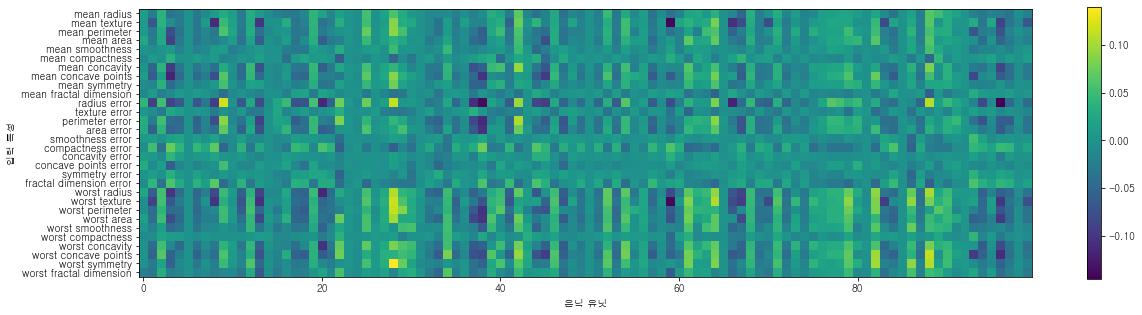

In [55]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names);
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()